# CTI Turnoffs
Originally written by Alex Broughton

In [2]:
! eups list -s | grep lsst_distrib

lsst_distrib          g4213664e8e+995cec829e 	w_2023_29 setup


In [11]:
from astropy.io import fits
from astropy.table import Table
import pylab
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

slacAmps = {'C10':'AMP01','C11':'AMP02','C12':'AMP03','C13':'AMP04',\
           'C14':'AMP05','C15':'AMP06','C16':'AMP07','C17':'AMP08',\
           'C07':'AMP09','C06':'AMP10','C05':'AMP11','C04':'AMP12',\
           'C03':'AMP13','C02':'AMP14','C01':'AMP15','C00':'AMP16'}
slacAmps2 = {y: x for x, y in slacAmps.items()}




In [20]:
sensor = "R24_S11"
det = 112
fh = fits.open(f"/fs/ddn/sdf/group/lsst/camera/IandT/jobHarness/jh_archive/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/13144/overscan_BOT/v0/106995/{sensor}_13144_overscan_results.fits")

import sys
sys.path.append('/sdf/home/a/abrought/bin')
from SpotAnalysis import *
ptc_turnoffs_list, scti_turnoffs, pcti_turnoffs, moss, gains = getSensorData(sensor=sensor, detector=det)


In [4]:
repo_path = "/sdf/group/rubin/repo/main/"
butler = Butler(repo_path)
registry = butler.registry

dcti = butler.get('cpCtiProc', detector=det, instrument='LSSTCam', collections='u/abrought/BF/2023.04.14/cti.2023.04.14')


KeyError: "No value in data ID ({'detector': 83, 'instrument': 'LSSTCam'}) for required dimension 'exposure'."

In [ ]:
dcti?

In [17]:
table=Table(fh[1].data)
fh.info()


Filename: /fs/ddn/sdf/group/lsst/camera/IandT/jobHarness/jh_archive/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/13144/overscan_BOT/v0/106995/R02_S00_13144_overscan_results.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  AMP01         1 BinTableHDU     32   684R x 7C   ['65E', '65E', '49E', '49E', 'E', 'E', 'E']   
  2  AMP02         1 BinTableHDU     32   684R x 7C   [65E, 65E, 49E, 49E, E, E, E]   
  3  AMP03         1 BinTableHDU     32   684R x 7C   [65E, 65E, 49E, 49E, E, E, E]   
  4  AMP04         1 BinTableHDU     32   684R x 7C   [65E, 65E, 49E, 49E, E, E, E]   
  5  AMP05         1 BinTableHDU     32   684R x 7C   [65E, 65E, 49E, 49E, E, E, E]   
  6  AMP06         1 BinTableHDU     32   684R x 7C   [65E, 65E, 49E, 49E, E, E, E]   
  7  AMP07         1 BinTableHDU     32   684R x 7C   [65E, 65E, 49E, 49E, E, E, E]   
  8  AMP08         1 BinTableHDU     32   684R x 7C   [65E, 65E, 49E, 49E, E, E, E]   
 

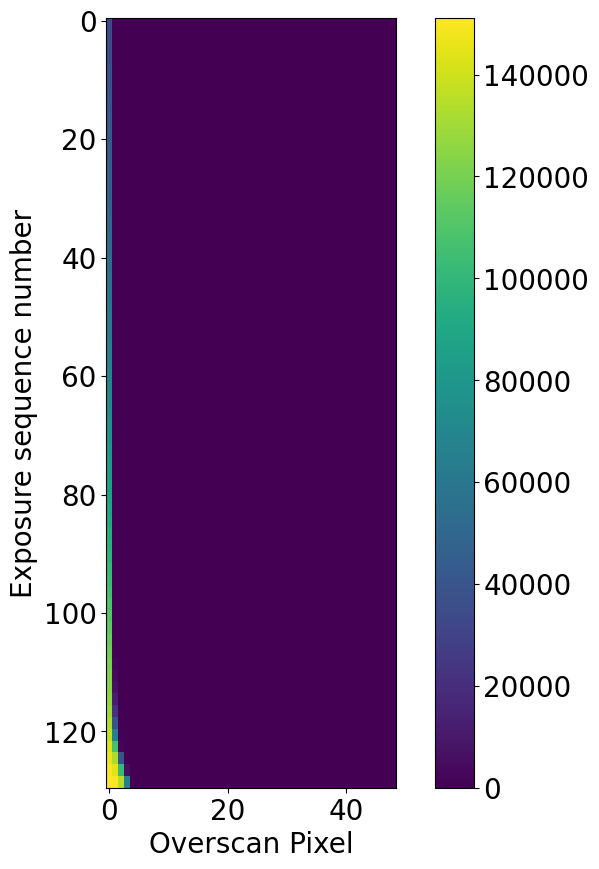

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(fh[1].data['ROW_MEAN'][550:680,:]- fh[1].data['ROW_MEAN'][550,-1])
#print(fh[1].data['ROW_MEAN'].shape )
plt.xlabel("Overscan Pixel")
plt.ylabel("Exposure sequence number")
plt.colorbar()


AMP01 C10 107815.51 e- -> 73562.81644628433 adu
AMP02 C11 102818.81 e- -> 70336.05663976239 adu
AMP03 C12 101863.836 e- -> 69566.79738070256 adu
AMP04 C13 101686.56 e- -> 69278.08278006423 adu
AMP05 C14 103564.41 e- -> 70460.99414068599 adu
AMP06 C15 48488.68 e- -> 33068.77689324827 adu
AMP07 C16 102030.99 e- -> 69184.89265011385 adu
AMP08 C17 103146.04 e- -> 69566.34765648194 adu
AMP09 C07 101260.555 e- -> 66845.86048646922 adu
AMP10 C06 104922.9 e- -> 68660.3074629329 adu
AMP11 C05 103976.2 e- -> 67878.08664878072 adu
AMP12 C04 103516.33 e- -> 68106.97969718267 adu
AMP13 C03 103862.28 e- -> 67971.2688865967 adu
AMP14 C02 97201.75 e- -> 63565.20277750399 adu
AMP15 C01 103162.31 e- -> 67699.2187077302 adu
AMP16 C00 108223.88 e- -> 70731.95241991157 adu
{'C10': 64936.840978549466, 'C11': 60855.741786600076, 'C12': 60585.03770022552, 'C13': 60392.65820043784, 'C14': 61670.103884419754, 'C15': 28892.83256744684, 'C16': 61088.02903653129, 'C17': 62342.83677956836, 'C07': 63434.22006125949,

/lscratch/abrought/ipykernel_2461314/495677170.py:153: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  pylab.ylim(-1e-7,1e-7)


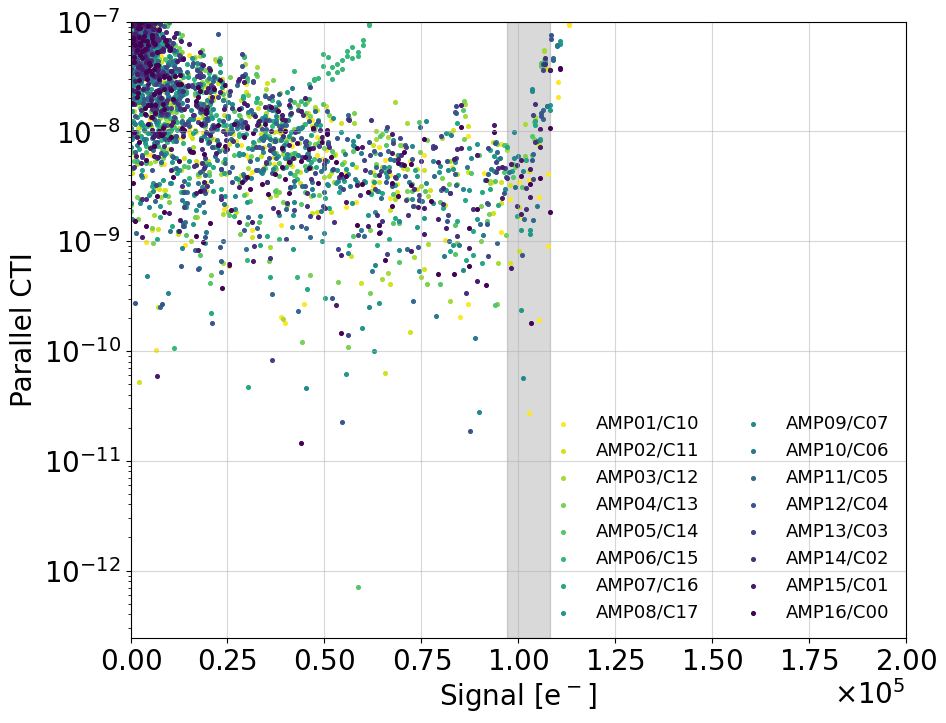

In [6]:
from scipy import stats
from scipy import interpolate

r03s12_gains = {'C10': 1.660313408964791, 'C11': 1.6895499008220098, 'C12': 1.6813365115248715, 'C13': 1.6837570249435183, 'C14': 1.679329200484197, 'C15': 1.6782251990803954, 'C16': 1.6702289105854828, 'C17': 1.6544970423338852, 'C07': 1.5963080272715733, 'C06': 1.7391941239612199, 'C05': 1.763171140065931, 'C04': 1.7414647587092777, 'C03': 1.7445774902814064, 'C02': 1.7320562196561253, 'C01': 1.7588309129449777, 'C00': 1.757425744342596}
r24s11_gains = {'C10': 1.4656250674038158, 'C11': 1.4618222489583592, 'C12': 1.4642593848334386, 'C13': 1.4678027800339444, 'C14': 1.4698118797929258, 'C15': 1.4662979475784617, 'C16': 1.474758264112622, 'C17': 1.482700221259772, 'C07': 1.5148365800152566, 'C06': 1.5281448964402597, 'C05': 1.5318081027092076, 'C04': 1.51990777722422, 'C03': 1.528032107555383, 'C02': 1.5291660492334673, 'C01': 1.5238331323345167, 'C00': 1.53005648946337}

def bin_cti(flux, pCTI, nbins=75):
    # i means the corresponding value is between (bin_edges[i-1], bin_edges[i])
    means, bin_edges, binnumber = stats.binned_statistic(flux, pCTI, statistic='mean', bins=nbins)
    stds, _, _ = stats.binned_statistic(flux, pCTI, statistic='std', bins=nbins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    means = fill_nan(means)
    stds = fill_nan(stds)

    return means, stds, bin_centers, binnumber

def fill_nan(y):
    nans = np.isnan(y)
    x = lambda z: z.nonzero()[0]
    y[nans] = np.interp(x(nans), x(~nans), y[~nans])
    return y


def find_pcti_turnoff2(flux, pCTI, threshold_sigma=5.0):
    # Bin the CTI and calculate sigma deviation point
    means, stds, bin_centers, binnumber = bin_cti(flux, pCTI)
    turnoff = 0.
    for i in range(int(len(bin_centers) / 2.), len(bin_centers) - 1):
        if np.abs(means[i+1] - means[i]) > (threshold_sigma * stds[i]):
            turnoff = bin_centers[i]
            break
        else:
            continue
    print(turnoff)
    return turnoff

def find_pcti_turnoff(flux, pCTI):
    turnoff = 0.
    
    mask = (flux > 30000) * (flux < 70000)
    
    m,b = np.polyfit(flux[mask],pCTI[mask],deg=1)
    sigma = np.std(pCTI[mask])
    
    
    mask2 = (flux > 70000)
    i = 0
    for i in range(len(flux[mask2])):
        pcti1 = pCTI[mask2][i]
        f1 = flux[mask2][i]
        diff1 = pcti1 - (m*f1 + b)
        pcti2 = pCTI[mask2][i+1]
        f2 = flux[mask2][i+1]
        diff2 = pcti2 - (m*f2 + b)
        pcti3 = pCTI[mask2][i+2]
        f3 = flux[mask2][i+2]
        diff3 = pcti3 - (m*f3 + b)
        pcti4 = pCTI[mask2][i+3]
        f4 = flux[mask2][i+3]
        diff4 = pcti4 - (m*f4 + b)
        level = 6
        if (diff3-diff2) > (diff2-diff1) and (diff4-diff3) > (diff3-diff2):
            print(f1)
            turnoff=f1
            break
    return turnoff


def find_pcti_turnoff(flux, pCTI):
    # Find turnoff by looking at N consectutive increases of the paralle CTI
    means, stds, bin_centers, binnumber = bin_cti(flux, pCTI)
    turnoff = 0.
    start = int(np.min(np.argwhere(bin_centers > 50000.)))
    for i in range(start, len(bin_centers) - 5):
        #if means[i] < 1.0e4:
        #    print("here")
        #    continue
        if  means[i+5] > means[i+4] and means[i+4] > means[i+3] and means[i+3] > means[i+2] and means[i+2] > means[i+1] and means[i+1] > means[i] and means[i+5] > 1e-7:
            turnoff = bin_centers[i]
            break
        else:
            continue
    #print(turnoff)
    return turnoff

def func(x, a):
    return a

def find_pcti_turnoff(flux, pCTI):
    from scipy.optimize import curve_fit
    # Find turnoff by looking at N consectutive increases of the paralle CTI
    #print(np.mean(pCTI[flux < .5e5]))
    popt, pcov = curve_fit(func, flux[(flux > .25e5)*(flux < .5e5)], pCTI[(flux > .25e5)*(flux < .5e5)],sigma=1/np.sqrt(flux[(flux > .25e5)*(flux < .5e5)]))
    #print( popt[0] + 3*np.sqrt(pcov[0][0]))
    turnoff = flux[(pCTI <= popt[0] + 3*np.sqrt(pcov[0][0]))][-1]
    #print("THIS", turnoff)
   
    return turnoff

def find_scti_turnoff(sensor):
    sensorparams = pkl.load( open("/home/a/abrought/run5/BF/data/cti_turnoffs_run_13339_e-.pkl", "rb") )
    scti_turnoffs = sensorparams[(sensorparams["BAY_SLOT"] == sensor)]["CTI_TURNOFF"].to_numpy()
    return np.min(scti_turnoffs), np.max(scti_turnoffs)
    


pylab.figure(figsize=(10,8))
from matplotlib.pyplot import cm
pylab.axvspan(min(pcti_turnoffs), max(pcti_turnoffs), alpha=0.15, color='black')
color = cm.viridis(np.linspace(0, 1, 16))
turnoffs = []
pcti_turnoff_dict = dict()
for i in range(1,17):

    table=Table(fh[i].data)

    num_transfers=2000

    data = table['ROW_MEAN']
    signal = table['FLATFIELD_SIGNAL']
    lastpixel = data[:, 0]
    overscan1 = data[:, 1]
    overscan2 = data[:, 2]
    overscan3 = data[:, 3]

    cti = (overscan1+overscan2)/(num_transfers*lastpixel)

    pylab.scatter(signal, cti, color=color[16-i], s=7, label=fh[i].name + "/" + slacAmps2[fh[i].name])
    means, stds, bin_centers, binnumber = bin_cti(signal, cti)

    #if i == 6:
    #    print(fh[i].name + "/" + slacAmps2[fh[i].name])
    #    continue
    print(fh[i].name, slacAmps2[fh[i].name], find_pcti_turnoff(signal, cti), "e- ->", find_pcti_turnoff(signal, cti) / r24s11_gains[slacAmps2[fh[i].name]], "adu")
    pcti_turnoff_dict[slacAmps2[fh[i].name]] = find_pcti_turnoff(signal, cti) / r03s12_gains[slacAmps2[fh[i].name]]
    turnoffs.append(find_pcti_turnoff(signal, cti))


print(pcti_turnoff_dict)
turnoffs = np.asarray(turnoffs)
#pylab.axvspan(np.min(turnoffs), np.max(turnoffs), alpha=0.35, color='gray')
print(np.min(turnoffs), np.max(turnoffs))
#pylab.axvspan(np.min(turnoffs), np.max(turnoffs), alpha=0.15, color='blue')
#pylab.title("R03-S12")
pylab.semilogy()
pylab.ylabel("Parallel CTI")
pylab.xlabel("Signal [$\mathrm{e}^-$]")

pylab.xlim(0,2.0e5)
pylab.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)
#pylab.xticks(fontsize=13)
#pylab.yticks(fontsize=13)
pylab.ylim(-1e-7,1e-7)
pylab.grid(alpha=0.5)
pylab.legend(loc=4, ncol=2, fontsize=13, frameon=False)
pylab.savefig(f"../plots/Parallel_CTI_{sensor}.png", bbox_inches="tight")


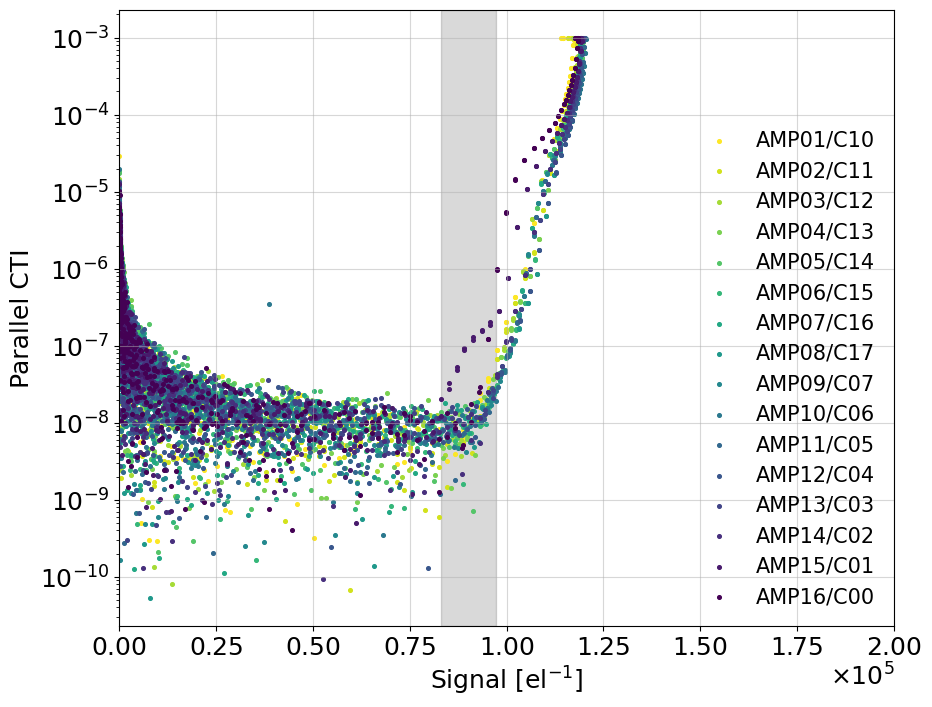

In [21]:
from scipy import stats
from scipy import interpolate

r03s12_gains = {'C10': 1.660313408964791, 'C11': 1.6895499008220098, 'C12': 1.6813365115248715, 'C13': 1.6837570249435183, 'C14': 1.679329200484197, 'C15': 1.6782251990803954, 'C16': 1.6702289105854828, 'C17': 1.6544970423338852, 'C07': 1.5963080272715733, 'C06': 1.7391941239612199, 'C05': 1.763171140065931, 'C04': 1.7414647587092777, 'C03': 1.7445774902814064, 'C02': 1.7320562196561253, 'C01': 1.7588309129449777, 'C00': 1.757425744342596}
r24s11_gains = {'C10': 1.4656250674038158, 'C11': 1.4618222489583592, 'C12': 1.4642593848334386, 'C13': 1.4678027800339444, 'C14': 1.4698118797929258, 'C15': 1.4662979475784617, 'C16': 1.474758264112622, 'C17': 1.482700221259772, 'C07': 1.5148365800152566, 'C06': 1.5281448964402597, 'C05': 1.5318081027092076, 'C04': 1.51990777722422, 'C03': 1.528032107555383, 'C02': 1.5291660492334673, 'C01': 1.5238331323345167, 'C00': 1.53005648946337}

def bin_cti(flux, pCTI, nbins=75):
    # i means the corresponding value is between (bin_edges[i-1], bin_edges[i])
    means, bin_edges, binnumber = stats.binned_statistic(flux, pCTI, statistic='mean', bins=nbins)
    stds, _, _ = stats.binned_statistic(flux, pCTI, statistic='std', bins=nbins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    means = fill_nan(means)
    stds = fill_nan(stds)

    return means, stds, bin_centers, binnumber

def fill_nan(y):
    nans = np.isnan(y)
    x = lambda z: z.nonzero()[0]
    y[nans] = np.interp(x(nans), x(~nans), y[~nans])
    return y


def find_pcti_turnoff2(flux, pCTI, threshold_sigma=5.0):
    # Bin the CTI and calculate sigma deviation point
    means, stds, bin_centers, binnumber = bin_cti(flux, pCTI)
    turnoff = 0.
    for i in range(int(len(bin_centers) / 2.), len(bin_centers) - 1):
        if np.abs(means[i+1] - means[i]) > (threshold_sigma * stds[i]):
            turnoff = bin_centers[i]
            break
        else:
            continue
    print(turnoff)
    return turnoff

def find_pcti_turnoff(flux, pCTI):
    turnoff = 0.
    
    mask = (flux > 30000) * (flux < 70000)
    
    m,b = np.polyfit(flux[mask],pCTI[mask],deg=1)
    sigma = np.std(pCTI[mask])
    
    
    mask2 = (flux > 70000)
    i = 0
    for i in range(len(flux[mask2])):
        pcti1 = pCTI[mask2][i]
        f1 = flux[mask2][i]
        diff1 = pcti1 - (m*f1 + b)
        pcti2 = pCTI[mask2][i+1]
        f2 = flux[mask2][i+1]
        diff2 = pcti2 - (m*f2 + b)
        pcti3 = pCTI[mask2][i+2]
        f3 = flux[mask2][i+2]
        diff3 = pcti3 - (m*f3 + b)
        pcti4 = pCTI[mask2][i+3]
        f4 = flux[mask2][i+3]
        diff4 = pcti4 - (m*f4 + b)
        level = 6
        if (diff3-diff2) > (diff2-diff1) and (diff4-diff3) > (diff3-diff2):
            print(f1)
            turnoff=f1
            break
    return turnoff


def find_pcti_turnoff(flux, pCTI):
    # Find turnoff by looking at N consectutive increases of the paralle CTI
    means, stds, bin_centers, binnumber = bin_cti(flux, pCTI)
    turnoff = 0.
    start = int(np.min(np.argwhere(bin_centers > 50000.)))
    for i in range(start, len(bin_centers) - 5):
        #if means[i] < 1.0e4:
        #    print("here")
        #    continue
        if  means[i+5] > means[i+4] and means[i+4] > means[i+3] and means[i+3] > means[i+2] and means[i+2] > means[i+1] and means[i+1] > means[i] and means[i+5] > 1e-7:
            turnoff = bin_centers[i]
            break
        else:
            continue
    #print(turnoff)
    return turnoff

def func(x, a):
    return a

def find_pcti_turnoff(flux, pCTI):
    from scipy.optimize import curve_fit
    # Find turnoff by looking at N consectutive increases of the paralle CTI
    #print(np.mean(pCTI[flux < .5e5]))
    popt, pcov = curve_fit(func, flux[(flux > .25e5)*(flux < .5e5)], pCTI[(flux > .25e5)*(flux < .5e5)],sigma=1/np.sqrt(flux[(flux > .25e5)*(flux < .5e5)]))
    #print( popt[0] + 3*np.sqrt(pcov[0][0]))
    turnoff = flux[(pCTI <= popt[0] + 3*np.sqrt(pcov[0][0]))][-1]
    #print("THIS", turnoff)
   
    return turnoff

def find_scti_turnoff(sensor):
    sensorparams = pkl.load( open("/home/a/abrought/run5/BF/data/cti_turnoffs_run_13339_e-.pkl", "rb") )
    scti_turnoffs = sensorparams[(sensorparams["BAY_SLOT"] == sensor)]["CTI_TURNOFF"].to_numpy()
    return np.min(scti_turnoffs), np.max(scti_turnoffs)
    


pylab.figure(figsize=(10,8))
from matplotlib.pyplot import cm
pylab.axvspan(min(pcti_turnoffs), max(pcti_turnoffs), alpha=0.15, color='black')
color = cm.viridis(np.linspace(0, 1, 16))
turnoffs = []
pcti_turnoff_dict = dict()
for i in range(1,17):

    table=Table(fh[i].data)

    num_transfers=2000

    data = table['ROW_MEAN']
    signal = table['FLATFIELD_SIGNAL']
    lastpixel = data[:, 0]
    overscan1 = data[:, 1]
    overscan2 = data[:, 2]
    overscan3 = data[:, 3]

    cti = (overscan1+overscan2)/(num_transfers*lastpixel)

    pylab.scatter(signal, cti, color=color[16-i], s=7, label=fh[i].name + "/" + slacAmps2[fh[i].name])
    means, stds, bin_centers, binnumber = bin_cti(signal, cti)

    #if i == 6:
    #    print(fh[i].name + "/" + slacAmps2[fh[i].name])
    #    continue
    #print(fh[i].name, slacAmps2[fh[i].name], find_pcti_turnoff(signal, cti), "e- ->", find_pcti_turnoff(signal, cti) / r24s11_gains[slacAmps2[fh[i].name]])
    pcti_turnoff_dict[slacAmps2[fh[i].name]] = find_pcti_turnoff(signal, cti) / r03s12_gains[slacAmps2[fh[i].name]]
    turnoffs.append(find_pcti_turnoff(signal, cti))


#print(pcti_turnoff_dict)
turnoffs = np.asarray(turnoffs)
#pylab.axvspan(np.min(turnoffs), np.max(turnoffs), alpha=0.35, color='gray')
#print(np.min(turnoffs), np.max(turnoffs))
#pylab.axvspan(np.min(turnoffs), np.max(turnoffs), alpha=0.15, color='blue')
#pylab.title("R03-S12")
pylab.semilogy()
pylab.ylabel("Parallel CTI")
pylab.xlabel("Signal [el$^{-1}$]")

pylab.xlim(0,2.0e5)
pylab.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)
#pylab.xticks(fontsize=13)
#pylab.yticks(fontsize=13)
#pylab.ylim(-1e-7,1e-7)
pylab.grid(alpha=0.5)
pylab.legend(loc=4, ncol=1, fontsize=15, frameon=False)
pylab.savefig(f"../plots/Parallel_CTI_{sensor}.png", bbox_inches="tight")


In [ ]:
r03s12
97201.75 108223.88

r24-s11
83000.445 97289.7

r02-s00
80099.695 94984.21

r21-S02
73349.6 86367.68

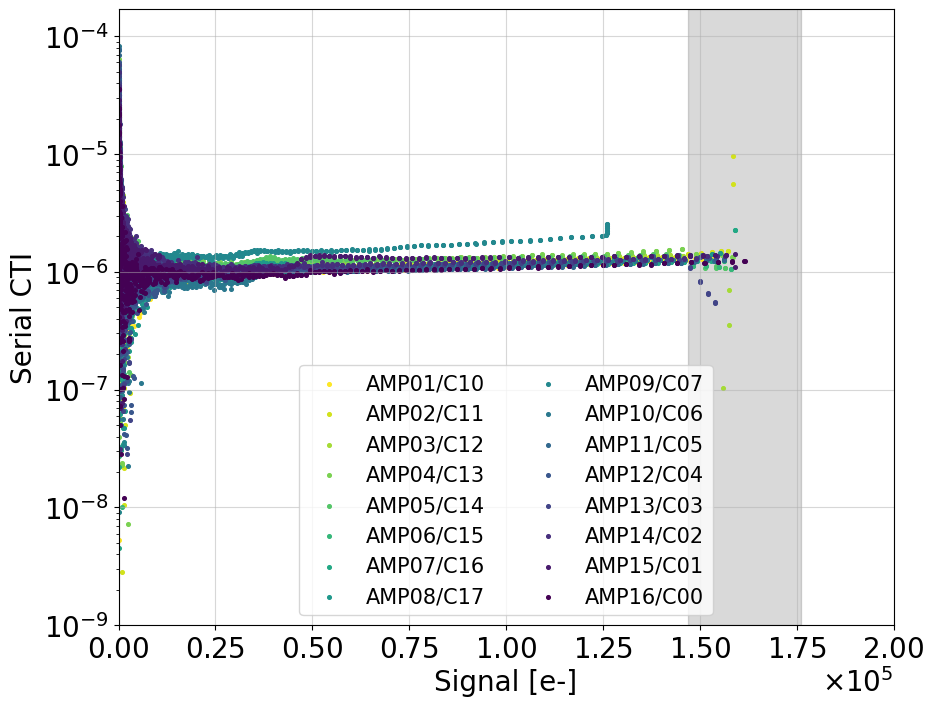

In [8]:
pylab.figure(figsize=(10,8))
pylab.grid(alpha=0.5)
from matplotlib.pyplot import cm
color = cm.viridis(np.linspace(0, 1, 16))

pylab.axvspan(min(scti_turnoffs), max(scti_turnoffs), alpha=0.15, color='black') 
for i in range(1,17):
    table=Table(fh[i].data)

    num_transfers=500
    data = table['COLUMN_MEAN']
    signal = table['FLATFIELD_SIGNAL']
    lastpixel = data[:, 0]
    overscan1 = data[:, 1]
    overscan2 = data[:, 2]
    overscan3 = data[:, 3]
    
    #cti = (overscan1+overscan2)/(num_transfers*lastpixel)
    overscan = np.sum(data[:, 1:], axis=1)

    cti = (overscan1 + overscan2)/(num_transfers*lastpixel)

    pylab.scatter(signal, cti, s=7, color=color[16-i], label=fh[i].name + "/" + slacAmps2[fh[i].name])

#pylab.title("R02-S00")
#pylab.axhline(y=, linestyle='--', color='black')    
pylab.semilogy()
pylab.ylabel("Serial CTI")
pylab.xlabel("Signal [e-]")
#pylab.xticks(fontsize=13)
#pylab.yticks(fontsize=13)
pylab.ylim(1e-9)
pylab.xlim(0,2.0e5)
pylab.legend(loc='lower center', ncol=2, fontsize=15)
pylab.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)
pylab.savefig(f"../plots/Serial_CTI_{sensor}.png", bbox_inches="tight")

In [65]:
# R03-S12

{'C10': 64936.840978549466, 'C11': 60855.741786600076, 'C12': 60585.03770022552, 'C13': 60392.65820043784, 'C14': 61670.103884419754, 'C15': 56119.281173966745, 'C16': 61088.02903653129, 'C17': 62342.83677956836, 'C07': 63434.22006125949, 'C06': 60328.45729637455, 'C05': 58971.13488433799, 'C04': 59442.10332554949, 'C03': 59534.34675650128, 'C02': 56119.281173966745, 'C01': 58653.91137984125, 'C00': 61580.913538388806}

# R24-S11

{'C10': 62050.38094162392, 'C11': 62239.20611061358, 'C12': 63215.74110862148, 'C13': 64176.13820047512, 'C14': 63747.87951652734, 'C15': 63542.748400058255, 'C16': 64173.610552334314, 'C17': 61753.16910805145, 'C07': 59093.879493983724, 'C06': 63665.234462799766, 'C05': 60938.03959347532, 'C04': 61949.71878291115, 'C03': 61764.45497829913, 'C02': 60838.81884288167, 'C01': 54468.198355382316, 'C00': 59403.1682822884}



#R21-S02



print()

# Plot entire focal plane

In [12]:
import glob
import re

files = glob.glob("/fs/ddn/sdf/group/lsst/camera/IandT/jobHarness/jh_archive/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/13144/overscan_BOT/v0/106995/*_13144_overscan_results.fits")
pCTI_turnoffs = dict()
for file in files:
    sensor = re.findall("R\w\w_S\w\w", file)[0]
    if 'W' in sensor or 'G' in sensor:
        continue
    fh = fits.open(file)
    pCTI_turnoffs[sensor] = dict()
    for i in range(1,17):
        table=Table(fh[i].data)
        try:
            num_transfers=4000
            data = table['ROW_MEAN']
            signal = table['FLATFIELD_SIGNAL']
            lastpixel = data[:, 0]
            overscan1 = data[:, 1]
            overscan2 = data[:, 2]
            cti = (overscan1+overscan2)/(num_transfers*lastpixel)

            pCTI_turnoffs[sensor][slacAmps2[fh[i].name]] = find_pcti_turnoff(signal, cti)
        except:
            continue




In [13]:
"""
Functions to plot amplifier-level quantities in the LSST focal plane.
"""
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import numpy as np
import lsst.geom as lsstGeom
from lsst.afw import cameraGeom
import lsst.afw.math as afwMath
#from lsst.obs.lsst.imsim import ImsimMapper

#__all__ = ['plot_amp_boundaries', 'plot_det', 'plot_focal_plane',
#           'hist_amp_data', 'get_median_nsigma_range']


def get_amp_patches(det, amps=None):
    """
    Return a list of Rectangle patches in focalplane coordinates
    corresponding to the amplifier segments in a detector object.
    Parameters
    ----------
    det: `lsst.afw.cameraGeom.detector.detector.Detector`
        Detector object.
    amps: container-type object [None]
        Python container that can be queried like `'C01 in amps'`
        to see if a particular channel is included for plotting.
        If None, then use all channels in det.
    Returns
    -------
    list of matplotlib.patches.Rectangle objects
    """
    transform = det.getTransform(cameraGeom.PIXELS, cameraGeom.FOCAL_PLANE)
    bbox = list(det)[0].getBBox()
    dy, dx = bbox.getHeight(), bbox.getWidth()
    patches = []
    for amp in det:
        if amps is not None and amp.getName() not in amps:
            continue
        j, i = tuple(int(_) for _ in amp.getName()[1:])
        y, x = j*dy, i*dx
        x0, y0 = transform.applyForward(lsstGeom.Point2D(x, y))
        x1, y1 = transform.applyForward(lsstGeom.Point2D(x + dx, y + dy))
        patches.append(Rectangle((x0, y0), x1 - x0, y1 - y0))
    return patches


def plot_amp_boundaries(ax, camera=None, edgecolor='black', facecolor='white'):
    """
    Plot the amplifier boundaries for all of the detectors in a camera.
    Parameters
    ----------
    ax: `matplotlib.Axes`
        Axes object used to render the patch collection containing
        the amplifier boundary Rectangles.
    camera: `lsst.afw.cameraGeom.camera.camera.Camera` [None]
        Camera object containing the detector info. If None, use
        `lsst.obs.lsst.imsim.ImsimMapper().camera`
    edgecolor: str or tuple of RGBA values ["blue"]
        Color used to draw outline of amplifiers.
    facecolor: str or tuple of RGBA values ["white"]
        Color used to render the Rectangle corresponding to the
        amplifier region.
    Returns
    -------
    None
    """
    #if camera is None:
    #    camera = ImsimMapper().camera
    patches = []
    for det in camera:
        patches.extend(get_amp_patches(det))
    pc = PatchCollection(patches, edgecolor=edgecolor, linewidth=0.5, alpha=0.5, facecolor=facecolor)
    ax.add_collection(pc)

def plot_specific_amp_boundaries(ax, camera=None, edgecolor='#4c8bf5', facecolor='None'):
    """
    Plot the amplifier boundaries for all of the detectors in a camera.
    Parameters
    ----------
    ax: `matplotlib.Axes`
        Axes object used to render the patch collection containing
        the amplifier boundary Rectangles.
    camera: `lsst.afw.cameraGeom.camera.camera.Camera` [None]
        Camera object containing the detector info. If None, use
        `lsst.obs.lsst.imsim.ImsimMapper().camera`
    edgecolor: str or tuple of RGBA values ["blue"]
        Color used to draw outline of amplifiers.
    facecolor: str or tuple of RGBA values ["white"]
        Color used to render the Rectangle corresponding to the
        amplifier region.
    Returns
    -------
    None
    """
    #if camera is None:
    #    camera = ImsimMapper().camera
    patches = []
    for det in camera:
        if det.getId() in [23,112]:
            patches.extend(get_amp_patches(det))
    pc = PatchCollection(patches, edgecolor=edgecolor, linewidth=1.0, alpha=1.0, facecolor=facecolor)
    ax.add_collection(pc)


def plot_det(ax, det, amp_values, cm=plt.cm.hot, z_range=None, use_log10=False):
    """
    Plot the amplifiers in a detector, rendering each amplier region with
    a color corresponding to its assigned value.
    Parameters
    ----------
    ax: `matplotlib.Axes`
        Axes object used to render the patch collection containing
        the amplifier boundary Rectangles.
    det: `lsst.afw.cameraGeom.detector.detector.Detector`
        Detector object.
    amp_values: dict of floats
        Dictionary of amplifier values to render, keyed by channel ID,
        e.g., 'C00', 'C01', etc.
    cm: `matplotlib.colors.Colormap`
        Colormap used to render amplifier values.
    z_range: 2-tuple of floats [None]
        Minimum and maximum values into which to map the unit interval
        for the color map.  Values are mapped using
        max(0, min(1, (amp_value - z_range[0])/(z_range[1] - z_range[0])))
        If None, then use
        z_range = (min(amp_values.values()), max(amp_values.values()))
    use_log10: bool [False]
        If True, then use log10(amp_value) for positive amp_value.  For
        non-positive amp_value, don't render the amp color.
    Returns
    -------
    None
    """
    if z_range is None:
        zvals = amp_values.values()
        z_range = min(zvals), max(zvals)
    def mapped_value(amp_value):
        return max(0, min(1., ((amp_value - z_range[0])
                               /(z_range[1] - z_range[0]))))
    my_facecolors = []
    for amp in det:
        if amp.getName() not in amp_values:
            continue
        if use_log10:
            if amp_values[amp.getName()] <= 0:
                my_facecolors.append(None)
            else:
                my_facecolors.append(
                    cm(mapped_value(np.log10(amp_values[amp.getName()]))))
        else:
            my_facecolors.append(cm(mapped_value(amp_values[amp.getName()])))

    my_patches = get_amp_patches(det, amp_values)
    facecolors, patches = [], []
    for facecolor, patch in zip(my_facecolors, my_patches):
        if facecolor is not None:
            facecolors.append(facecolor)
            patches.append(patch)
    assert len(facecolors) == len(patches)
    pc = PatchCollection(patches, facecolors=facecolors)
    ax.add_collection(pc)


def get_median_nsigma_range(amp_data, nsigma=4, use_log10=False):
    """
    Use a clipped stdev to compute the range of amp_data appropriate
    for plotting as a full focal plane mosaic or as a histogram of
    per-amp values.  The returned range will be
    (median - nsigma*stdev_clip, median + nsigma*stdev_clip).
    Parameters
    ----------
    amp_data: dict of dict of floats
        Dictionary of dictionary of amplifier values to render,
        keyed by detector name, e.g., 'R01_S00' and then by channel ID,
        e.g., 'C00'.
    nsigma: float [4]
        Number of sigma to use for computing the plotting range.
    use_log10: bool [False]
        If True, then use the log10 of the amp_data values, excluding
        non-positive values.
    Returns
    -------
    (float, float)
    """
    amp_values = []
    for _ in amp_data.values():
        amp_values.extend(_.values())
    amp_values = np.array(amp_values, dtype=np.float64)
    if use_log10:
        amp_values = np.array([np.log10(_) for _ in amp_values if _ > 0])
    stats = afwMath.makeStatistics(amp_values,
                                   afwMath.MEDIAN | afwMath.STDEVCLIP)
    median = stats.getValue(afwMath.MEDIAN)
    stdev = stats.getValue(afwMath.STDEVCLIP)
    return (median - nsigma*stdev, median + nsigma*stdev)


def plot_focal_plane(ax, amp_data, camera=None, cm=plt.cm.hot,
                     x_range=(-325, 325), y_range=(-325, 325),
                     z_range=None, use_log10=False, scale_factor='1',
                     title='', nsigma=4):
    """
    Make a "heat map" plot of the focalplane using per-amplifier values.
    Parameters
    ----------
    ax: `matplotlib.Axes`
        Axes object used to render the patch collection containing
        the amplifier boundary Rectangles.
    amp_data: dict of dict of floats
        Dictionary of dictionary of amplifier values to render,
        keyed by detector name, e.g., 'R01_S00' and then by channel ID,
        e.g., 'C00'.
    camera: `lsst.afw.cameraGeom.camera.camera.Camera` [None]
        Camera object containing the detector info. If None, use
        `lsst.obs.lsst.imsim.ImsimMapper().camera`
    cm: `matplotlib.colors.Colormap`
        Colormap used to render amplifier values.
    x_range: tuple [(-325, 325)]
        Focalplane plotting region in x-direction in units of mm.
    y_range: tuple [(-325, 325)]
        Focalplane plotting region in y-direction in units of mm.
    z_range: 2-tuple of floats [None]
        Minimum and maximum values into which to map the unit interval
        for the color map.  Values are mapped using
        max(0, min(1, (amp_value - z_range[0])/(z_range[1] - z_range[0])))
        If None, then use
        z_range = get_median_nsigma_range(amp_data, nsigma=nsigma,
                                          use_log10=use_log10)
    use_log10: bool [False]
        If True, then use log10(amp_value) for positive amp_value.  For
        non-positive amp_value, don't render the amp color.
    scale_factor: str ['1']
        Scale factor to apply to the colorbar mapping.  This value
        will be cast as a float when applied to the tick label values.  It
        is passed as a string so that formatting in the colorbar tick
        labels can be controlled directly by the client code.
        This is not used if use_log10 == True.
    title: str ['']
        Title to apply to the plot.
    nsigma: float [4]
        Number of sigma to apply to clipped stdev for an "autoscaled"
        z_range, i.e., [median - nsigm*stdev_clip, median + nsigm*stdev_clip].
    Returns
    -------
    None
    """
    #if camera is None:
    #    camera = ().camera
    plot_amp_boundaries(ax, camera=camera)
    
    if z_range is None:
        z_range_values = []
        for _ in amp_data.values():
            z_range_values.extend(_.values())
        if use_log10:
            z_range_values = [np.log10(_) for _ in z_range_values if _ > 0]
        z_range = min(z_range_values), max(z_range_values)
    elif z_range == 'clipped_autoscale':
        z_range = get_median_nsigma_range(amp_data, nsigma=nsigma,
                                          use_log10=use_log10)
    for det_name, amp_values in amp_data.items():
        plot_det(ax, camera[det_name], amp_values, cm=cm, z_range=z_range,
                 use_log10=use_log10)
        max_amp_value = max(amp_values.values())
        
    plot_specific_amp_boundaries(ax, camera=camera)

    plt.xlim(*x_range)
    plt.ylim(*y_range)
    #plt.xlabel('y (mm)')
    #plt.ylabel('x (mm)')
    norm = plt.Normalize(vmin=z_range[0], vmax=z_range[1])
    sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
    sm.set_array([])
    colorbar = plt.colorbar(sm, pad=0.025, aspect=20, shrink=0.6)
    colorbar.formatter.set_powerlimits((0, 0))
    colorbar.formatter.set_useMathText(True)
    colorbar.ax.set_title(r"Electrons [$e^{-}$]", pad=30)

    if use_log10:
        ticks = sorted(list(set([int(_) for _ in
                                 np.log10(np.logspace(0, z_range[1]))])))
        ticklabels = [10**_ for _ in ticks]
        colorbar.set_ticks(ticks)
        colorbar.set_ticklabels(ticklabels)
    elif scale_factor != '1':
        ticks = colorbar.get_ticks()
        colorbar.set_ticks(ticks)
        ticklabels = [_/float(scale_factor) for _ in ticks]
        ticklabels[-1] = '{} x {}'.format(ticklabels[-1], scale_factor)
        colorbar.set_ticklabels(ticklabels)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.title(title, fontsize=15)
    return colorbar

def hist_amp_data(amp_data, x_label, bins=50, hist_range=None, color=None,
                  label=None, use_log10=False, yscale='log',
                  scale_factor='1'):
    """Histogram focal plane results from per amp data.
    amp_data: dict of dict of floats
        Dictionary of dictionary of amplifier values to render,
        keyed by detector name, e.g., 'R01_S00' and then by channel ID,
        e.g., 'C00'.
    x_label: str
        Label of x-axis. Typically, this is the results column name.
    bins: int [50]
        Number of histogram bins.
    hist_range: (float, float) [None]
        Histogram min and max values.  If None, then used plt.hist default.
    color: str [None]
        Histogram color.  If None, then used plt.hist default.
    label: str [None]
        Histogram label.
    use_log10: bool [False]
        If True, then use log10(amp_value) for positive amp_value.  For
        non-positive amp_value, don't render the amp color.
    yscale: str ['log']
        Argument to pass to plt.yscale(...).  The options are 'linear', 'log'.
    """
    amp_values = []
    for _ in amp_data.values():
        amp_values.extend(_.values())
    if use_log10:
        amp_values = [np.log10(_) for _ in amp_values if _ > 0]
    plt.hist(amp_values, bins=bins, range=hist_range, histtype='step',
             color=color, label=label)
    plt.xlabel(x_label)
    plt.ylabel('entries / bin')
    plt.yscale(yscale)
    ax = plt.axes()
    if use_log10:
        ticks = sorted(list(set([int(_) for _ in
                                 np.log10(np.logspace(0, max(amp_values)))])))
        ticklabels = [10**_ for _ in ticks]
        ax.set_xticks(ticks)
        ax.set_xticklabels(ticklabels)
    elif scale_factor != '1':
        ticks = [_ for _ in ax.get_xticks()
                 if (_ >= hist_range[0] and _ <= hist_range[1])]
        ax.set_xticks(ticks)
        ticklabels = ['{:.1f}'.format(_/float(scale_factor)) for _ in ticks]
        ticklabels[-1] += f'\nx {scale_factor}'
        ax.set_xticklabels(ticklabels)

/lscratch/abrought/ipykernel_4010738/1420807575.py:276: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  colorbar = plt.colorbar(sm, pad=0.025, aspect=20, shrink=0.6)


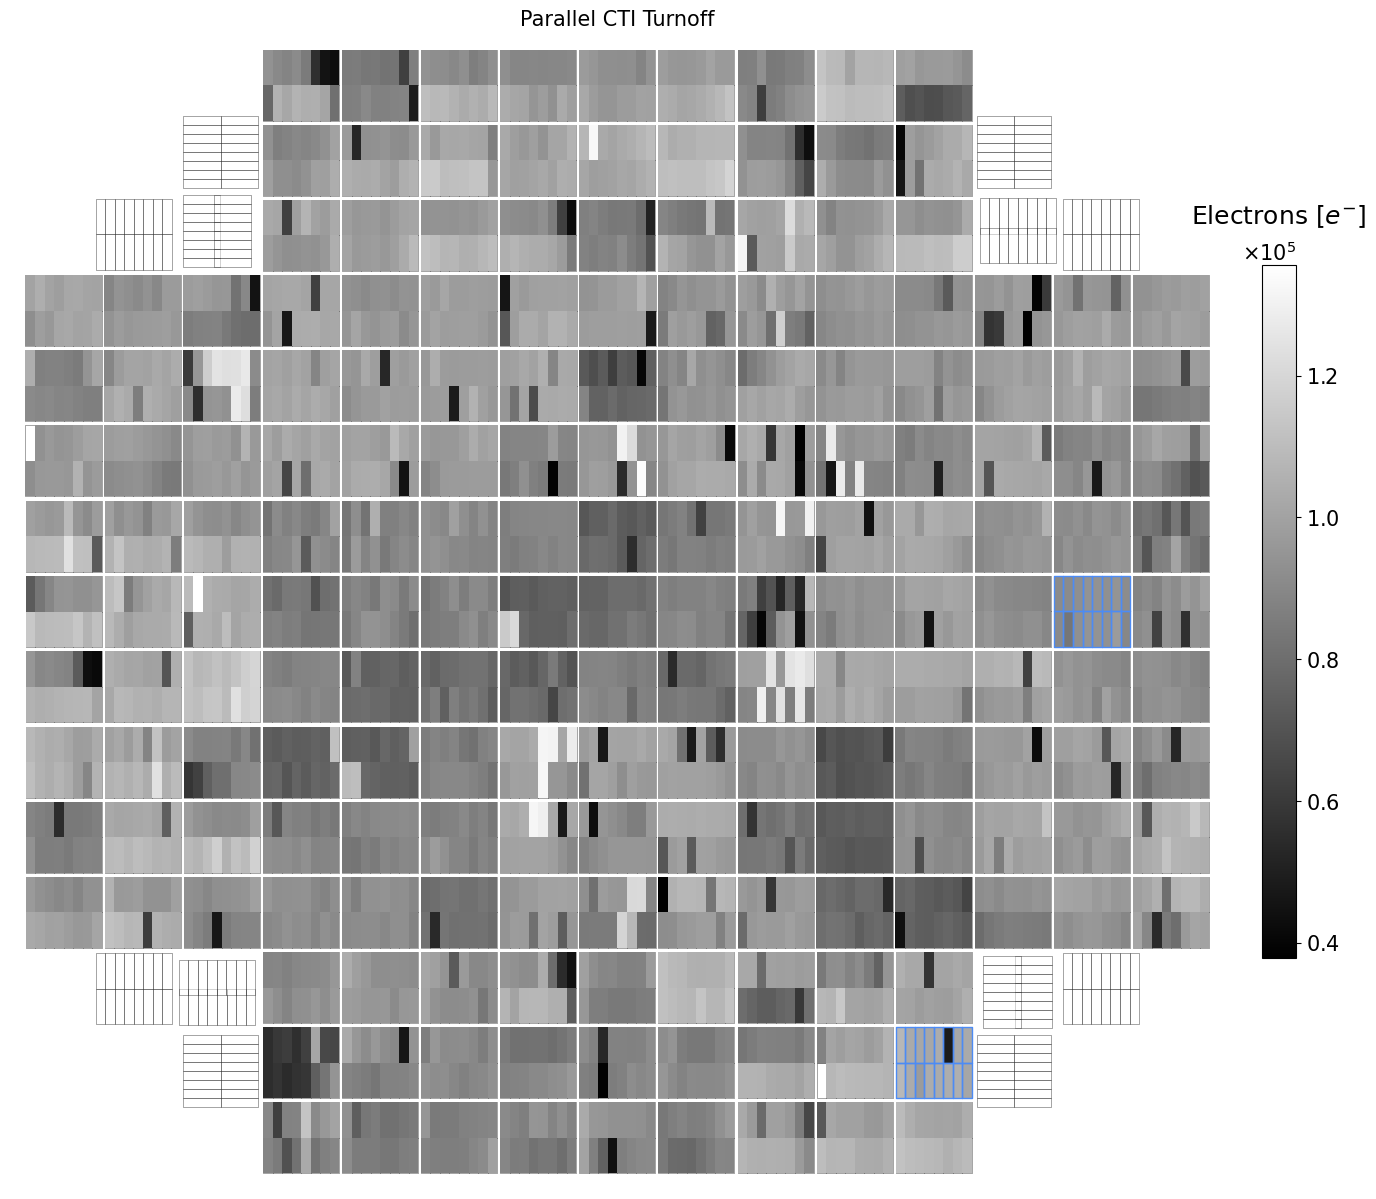

In [23]:
from lsst.obs.lsst import LsstCam
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

camera = LsstCam().getCamera()
fig, ax = plt.subplots(figsize=(19,15))
plot_focal_plane(ax, amp_data=pCTI_turnoffs, cm=plt.cm.gist_gray, camera=camera, title='Parallel CTI Turnoff')



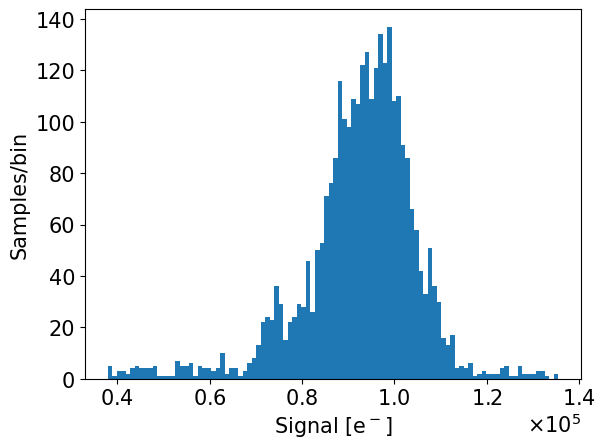

In [24]:
#print(pCTI_turnoffs)
turnoffs = []
for sensor in pCTI_turnoffs.keys():
    for amp in pCTI_turnoffs[sensor].keys():
        turnoffs.append(pCTI_turnoffs[sensor][amp])

h = pylab.hist(turnoffs, bins=100)
pylab.ylabel("Samples/bin")
pylab.xlabel("Signal [$\mathrm{e}^-$]")
pylab.ticklabel_format(axis="x", style="sci", scilimits=(0,0), useMathText=True)